<a href="https://colab.research.google.com/github/saerarawas/AAI614_rawas/blob/main/Graded_assignment_1_Rawas_Saera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Check Data Types:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('adult.csv')

# Display the first few rows to understand the data
print(data.head())

# Check data types
print(data.dtypes)


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

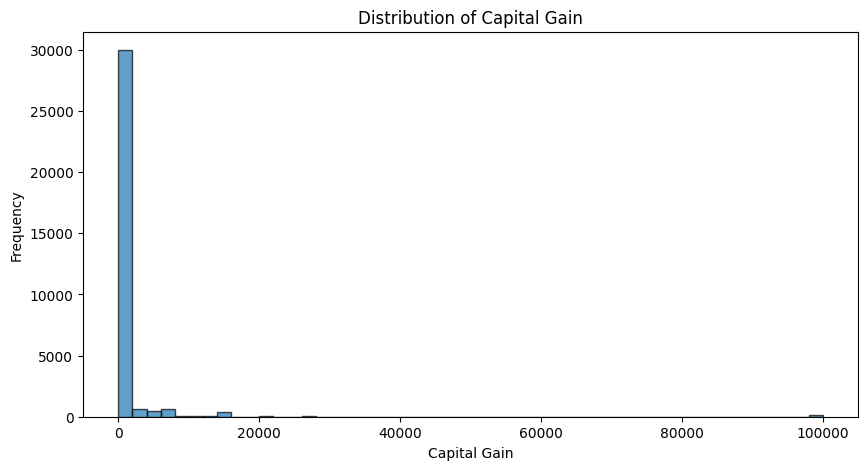

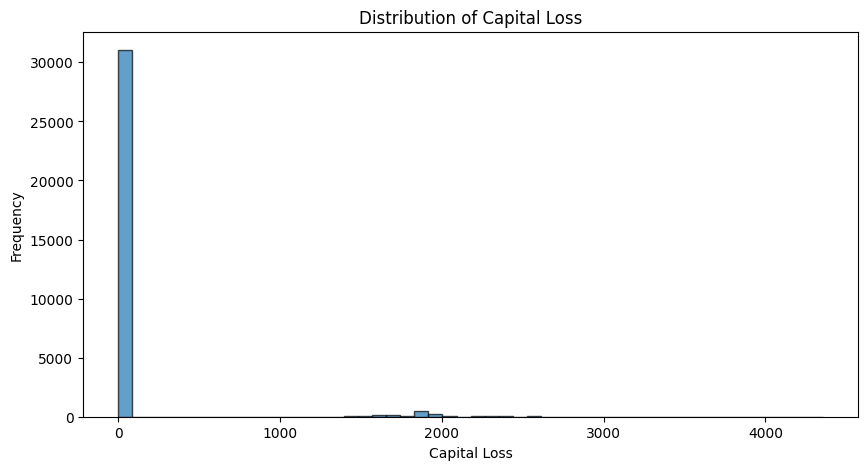

In [9]:
#Plot Distributions:
import matplotlib.pyplot as plt

# Plot capital_gain
plt.figure(figsize=(10, 5))
plt.hist(data['capital-gain'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.show()

# Plot capital_loss
plt.figure(figsize=(10, 5))
plt.hist(data['capital-loss'].dropna(), bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.show()

# Transforming variables if necessary
data['capital-gain-cat'] = pd.cut(data['capital-gain'], bins=[-1, 0, 5000, 10000, 15000, np.inf], labels=[0, 1, 2, 3, 4])
data['capital-loss-cat'] = pd.cut(data['capital-loss'], bins=[-1, 0, 500, 1000, 1500, np.inf], labels=[0, 1, 2, 3, 4])


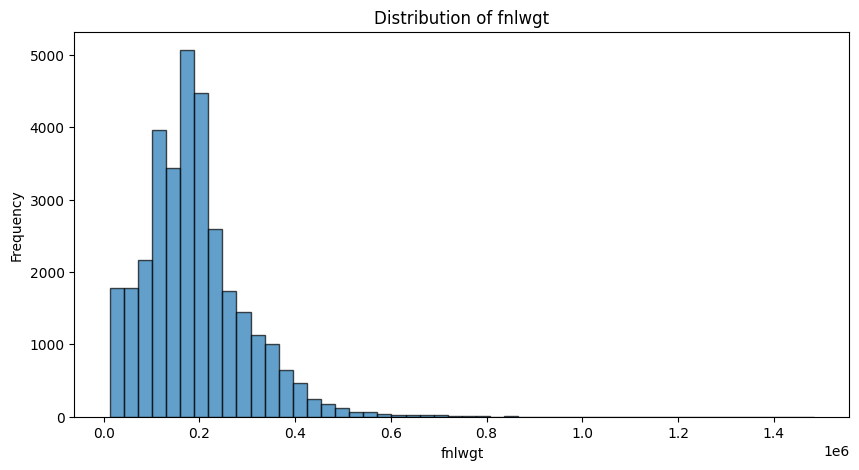

<Figure size 1000x500 with 0 Axes>

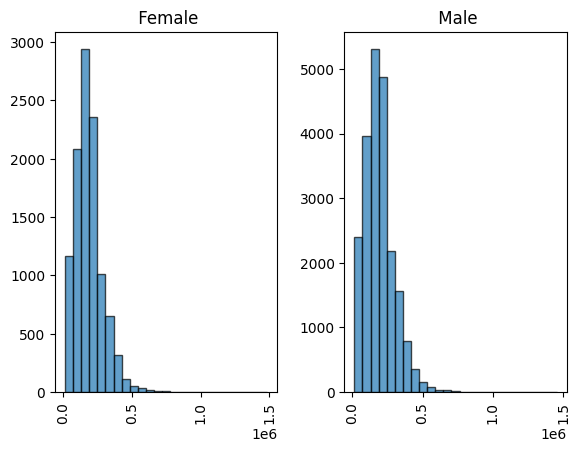

In [10]:
#explore fnlwgt:
plt.figure(figsize=(10, 5))
plt.hist(data['fnlwgt'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

# Compare fnlwgt by gender
plt.figure(figsize=(10, 5))
data['fnlwgt'].hist(by=data['sex'], bins=25, edgecolor='k', alpha=0.7)
plt.show()


In [11]:
#Correlation Analysis
# Calculate correlation matrix
correlation_matrix = data[['age', 'education-num', 'hours-per-week']].corr()
print(correlation_matrix)


                     age  education-num  hours-per-week
age             1.000000       0.036527        0.068756
education-num   0.036527       1.000000        0.148123
hours-per-week  0.068756       0.148123        1.000000


In [12]:
#Statistical Testing:

from scipy.stats import pearsonr

# Age and Education_num
corr_age_edu, _ = pearsonr(data['age'], data['education-num'])
print('Pearson correlation between age and education-num:', corr_age_edu)

# Hours_per_week and Education_num
corr_hours_edu, _ = pearsonr(data['hours-per-week'], data['education-num'])
print('Pearson correlation between hours-per-week and education-num:', corr_hours_edu)


Pearson correlation between age and education-num: 0.03652718946410611
Pearson correlation between hours-per-week and education-num: 0.1481227326229122


In [13]:
#Correlation by Gender:

male_corr = data[data['sex'] == 'Male'][['age', 'education-num']].corr()
female_corr = data[data['sex'] == 'Female'][['age', 'education-num']].corr()
print('Correlation for Males:\n', male_corr)
print('Correlation for Females:\n', female_corr)


Correlation for Males:
                age  education-num
age            NaN            NaN
education-num  NaN            NaN
Correlation for Females:
                age  education-num
age            NaN            NaN
education-num  NaN            NaN


In [15]:
#Covariance Matrix:

covariance_matrix = data[['education-num', 'hours-per-week']].cov()
print(covariance_matrix)

                education-num  hours-per-week
education-num        6.618890        4.705338
hours-per-week       4.705338      152.458995
